![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder.

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy, and _claim amounts_. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Instructions

1. Import the necessary libraries.
2. Load the `customer_value_analysis.csv` into the variable `customer_df`.
3. First look at its main features (`head`, `shape`, `info`).
4. Rename the columns so they follow the _PE8_ (snake case: lowecase_with_underscores).
5. Change the type of `effective_to_date` column to DateTime format.
6. Check `NaN` values per column.
7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.
8. Drop any ID column.
9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?
10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function **must have an optional argument set by default to 36** to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df. 
11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16). 
12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)
13. According to the previous histogram plots, do you think that you will have to apply any transformation?
14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import my_functions

In [3]:
# Load data
customer_df = pd.read_csv('./files_for_lab/customer_value_analysis.csv')

# Initial data overview
display(customer_df.info())
display(customer_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
# Format column names
customer_df = my_functions.format_column_names(customer_df)
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:
# Change effective_to_date data type to DateTime
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')
display(customer_df.head())
display(customer_df.dtypes)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [6]:
# Check null values
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [7]:
# Create function to split DataFrame into numerical and categorical dataframes
def split_numerical_categorical_columns(df: pd.DataFrame):
    '''

    This function takes a DataFrame and splits it into two:
    a categorical and a numerical DataFrame.

    Input:
        df: input pandas DataFrame

    Output:
        tuple: a tuple containing two dataframes -> (df_num , df_cat)
    
    '''
    df1 = df.copy()

    numericals_df = df1.select_dtypes(include='number')
    categoricals_df = df1.select_dtypes(include='object')

    return (numericals_df, categoricals_df)

In [8]:
# Split customer_df into numerical and categorical dataframes
numericals_df, categoricals_df = split_numerical_categorical_columns(customer_df)

In [9]:
# Drop customer - ID column
categoricals_df.drop('customer', axis=1, inplace=True)

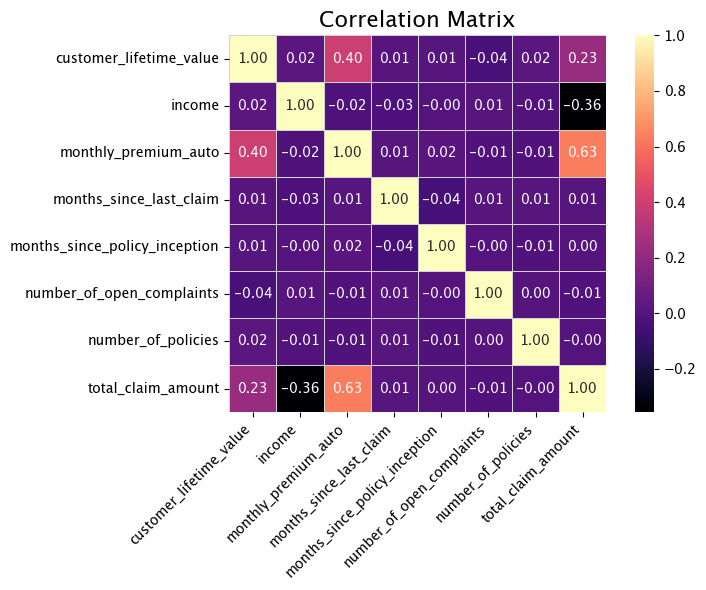

In [10]:
# Plot correlation matrix
my_functions.plot_correlation_matrix(numericals_df)

+ The pair of numerical columns that have the highest correlation are: total_claim_amount and monthly_premium_auto. This makes sense, since the higher the monthly rate, the higher amount they are going to have to pay.

In [11]:
def split_numericals_into_continous_and_discrete(df: pd.DataFrame, threshold: int=36):
    '''

    This function takes a pandas DataFrame as an input and returns 
    two pandas DataFrames: the first containing numerical continuous columns 
    and the second containing numerical discrete columns of the input dataframe.

    Input:
        df: input pandas DataFrame
        

    Output:
        tuple: two pandas DataFrames (df_cont, df_discrete)
        
    '''
    df1 = df.copy()

    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()

    for col in df1.columns:
        if df1[col].value_counts().shape[0] > threshold:
            continuous_df[col] = df1[col]
        else:
            discrete_df[col] = df1[col]
    
    return (continuous_df, discrete_df)

In [12]:
# Split the numerical_df into continuous and discrete
continuous_df, discrete_df = split_numericals_into_continous_and_discrete(numericals_df)

In [13]:
def plot_discrete_in_barplots(df: pd.DataFrame):
    '''

    This function generates a barplot for discrete numerical columns

    Input:
        df: pandas df

    Output:
        barplot
        
    '''
    import matplotlib.pyplot as plt
    import seaborn as sns

    for col in df.columns:
        
        fig, ax = plt.subplots(figsize=(8, 8))

        df[col].value_counts()
        
        # Create the barplot
        sns.barplot(x=df[col].value_counts().keys(), y=df[col].value_counts().values, color='lightblue')
        
        # Add labels and title
        plt.xlabel('Categories')
        plt.ylabel('Values')
        plt.title(col)
        
        # Display the plot
        plt.show()


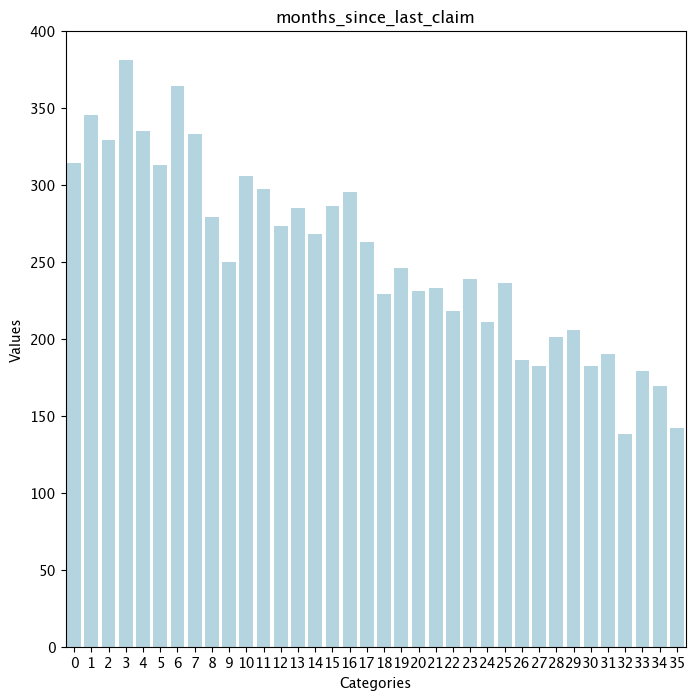

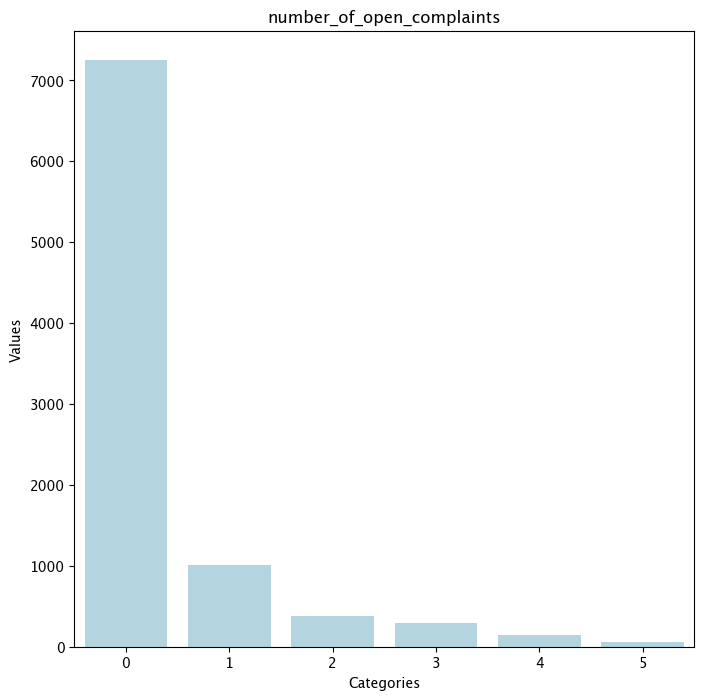

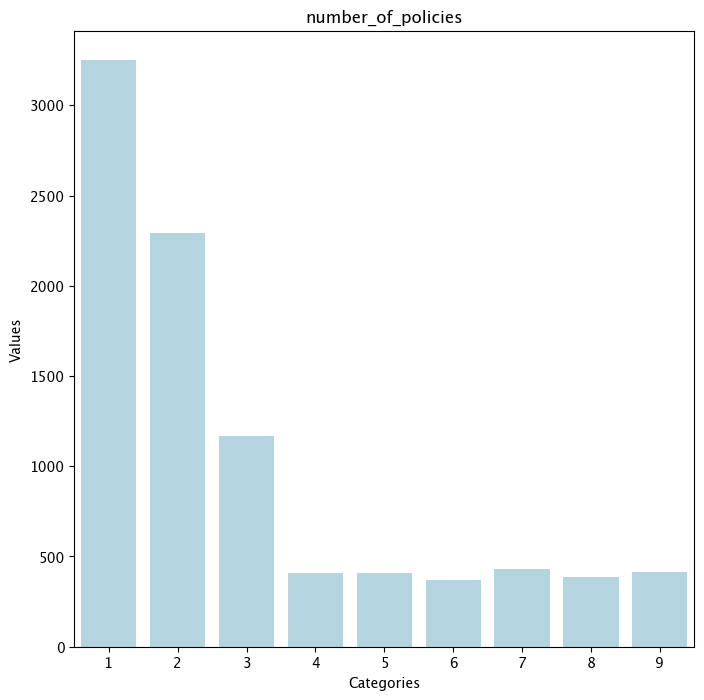

In [14]:
# Plot barplots for discrete columns
plot_discrete_in_barplots(discrete_df)

In [15]:
def plot_continuous_in_histograms(df: pd.DataFrame):
    '''

    This function generates a histogram for continuous numerical columns

    Input:
        df: pandas df

    Output:
        histograms
        
    '''
    import matplotlib.pyplot as plt
    import seaborn as sns

    for col in df.columns:
        
        fig, ax = plt.subplots(figsize=(8, 8))
        
        # Create the barplot
        sns.histplot(df, x = col, bins=20, ax=ax)
        
        # Add labels and title
        plt.xlabel('Categories')
        plt.ylabel('Values')
        plt.title(col)
        
        # Display the plot
        plt.show()


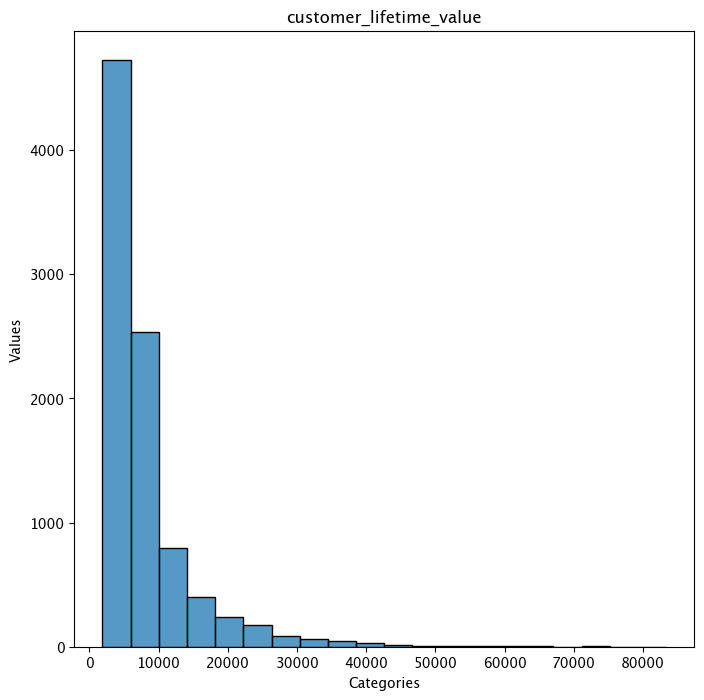

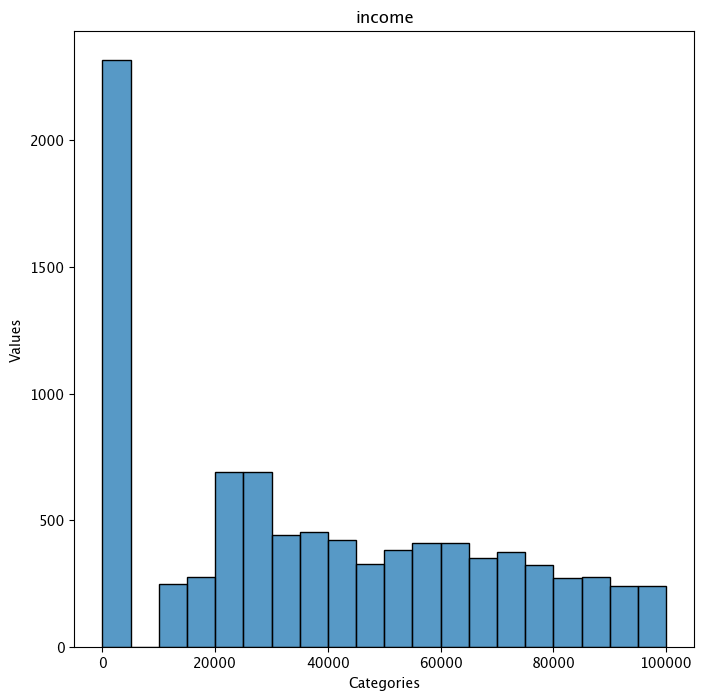

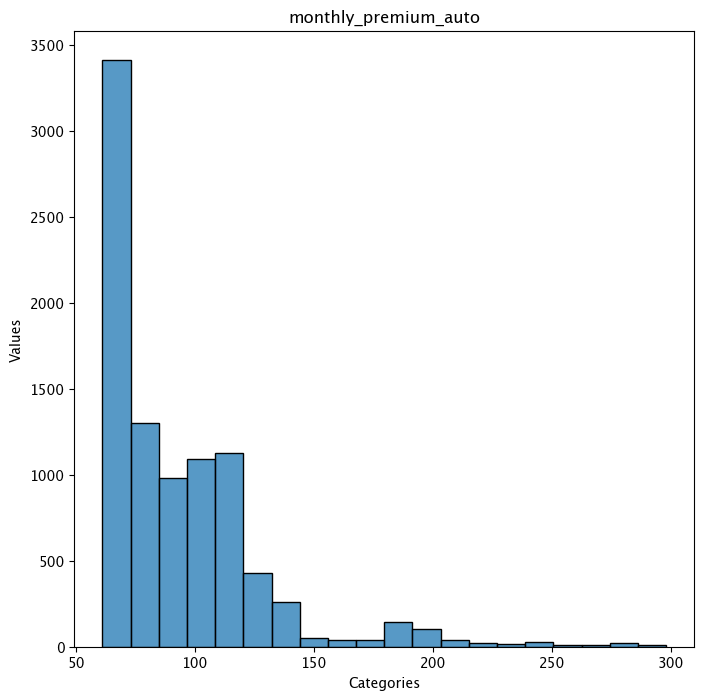

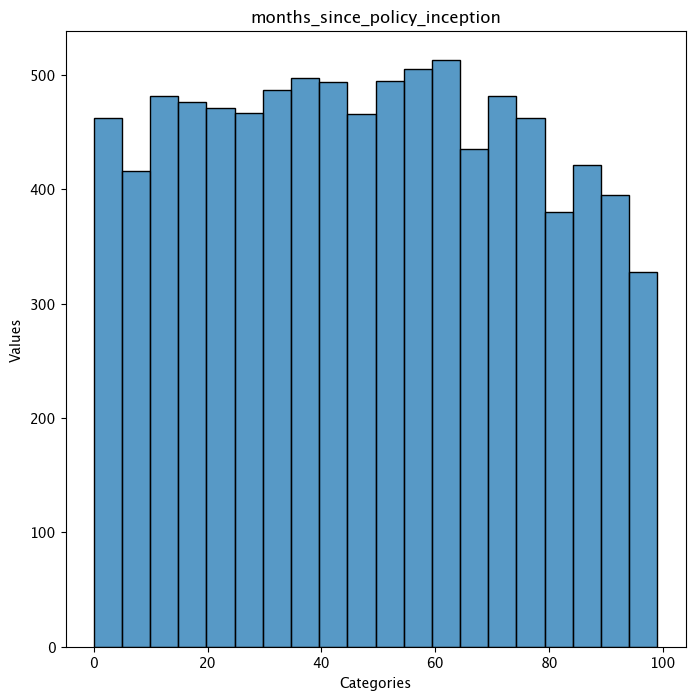

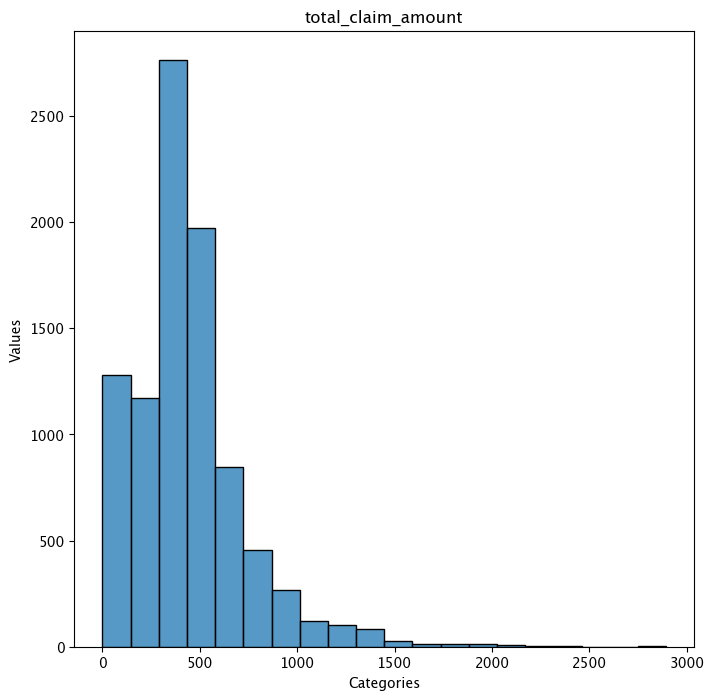

In [16]:
# Plot continuous in histogram
plot_continuous_in_histograms(continuous_df)

+ We will have to apply transformations: 'total_claim_amount', 'monthly_premium_auto' and 'customer_lifetime_value' are skewed, they show long tails on the right side of the plot

In [17]:
def plot_continuous_in_boxplot(df: pd.DataFrame):
    '''
    
    '''
    import matplotlib.pyplot as plt
    import seaborn as sns

    for column in df.columns:
        fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
        sns.boxplot(data=df, x=column, ax=ax_box)
        sns.histplot(data=df, x=column, ax=ax_hist)
        plt.show()
    

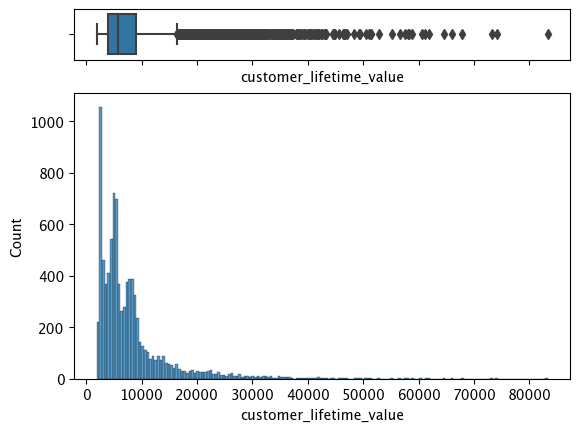

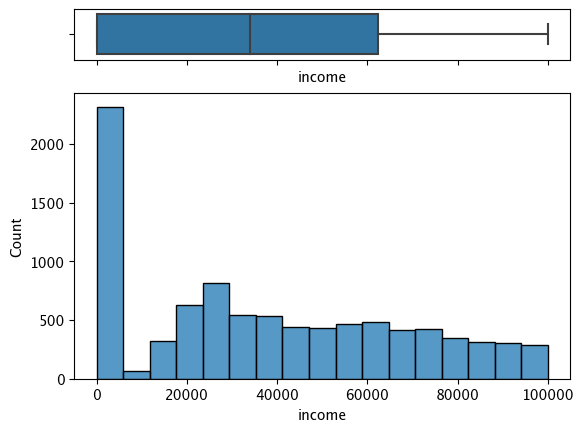

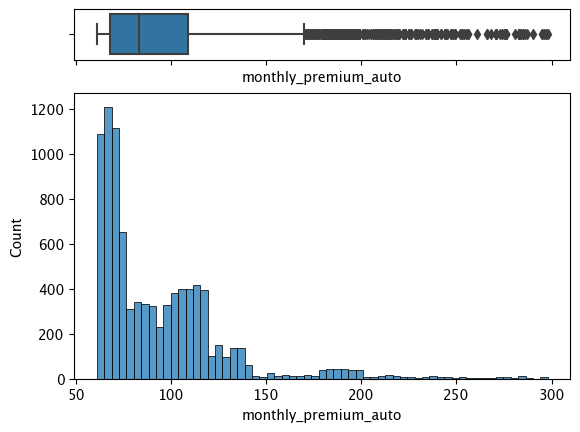

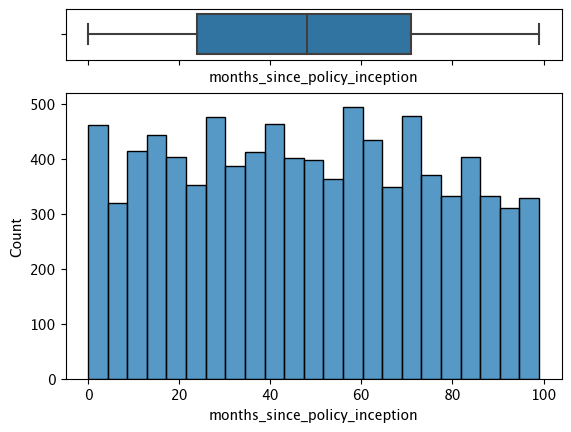

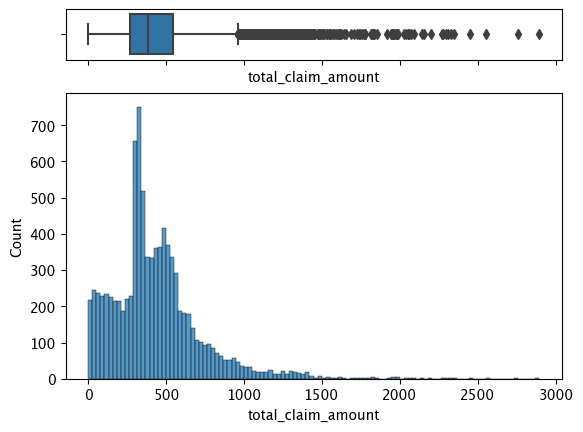

In [18]:
# Plot continuous variables in a histogram + boxplot
plot_continuous_in_boxplot(continuous_df)